<a href="https://www.kaggle.com/code/yudhaislamisulistya/autoencoder-and-knn?scriptVersionId=180898888" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# hidden warning
import warnings
warnings.filterwarnings('ignore')
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Pengenalan Dataset

In [2]:
file = "/kaggle/input/dataset-sarah/dataset_sarah.csv"
df = pd.read_csv(file, sep=";", encoding="utf-8")

## 2.1. Struktur Data dan Tipe Data pada Dataset

In [3]:
# Check Structure and types, and then make into a dataframe
df_structure = pd.DataFrame(df.dtypes, columns=["Data Type"])
df_structure["Column Name"] = df_structure.index
df_structure = df_structure.reset_index(drop=True)
df_structure

,Data Type,Column Name
0,int64,duration
1,object,protocol_type
2,object,service
3,object,flag
4,int64,src_bytes
5,int64,dst_bytes
6,int64,land
7,int64,wrong_fragment
8,int64,urgent
9,int64,hot


## 2.2. Pembersihan Data Termasusuk Mengatasi Missing Values

Tidak ada missing values pada dataset ini.

In [4]:
# Check for missing values
df_missing = pd.DataFrame(df.isnull().sum(), columns=["Number of Missing"])
df_missing["Column Name"] = df_missing.index
df_missing = df_missing.reset_index(drop=True)
df_missing

,Number of Missing,Column Name
0,0,duration
1,0,protocol_type
2,0,service
3,0,flag
4,0,src_bytes
5,0,dst_bytes
6,0,land
7,0,wrong_fragment
8,0,urgent
9,0,hot


## 2.3 Memisahakan data kategorikal dan numerikal

In [5]:
df_category = pd.DataFrame(df.dtypes[df.dtypes == "object"], columns=["Data Type"])
df_category["Column Name"] = df_category.index
df_category = df_category.reset_index(drop=True)
display(df_category)

df_numeric = pd.DataFrame(df.dtypes[df.dtypes != "object"], columns=["Data Type"])
df_numeric["Column Name"] = df_numeric.index
df_numeric = df_numeric.reset_index(drop=True)
display(df_numeric)

print("Jumlah Column kategorik: ", len(df_category))
print("Jumlah Column numerik: ", len(df_numeric))
print("Jumlah Column total: ", len(df_category) + len(df_numeric))

,Data Type,Column Name
0,object,protocol_type
1,object,service
2,object,flag
3,object,label


,Data Type,Column Name
0,int64,duration
1,int64,src_bytes
2,int64,dst_bytes
3,int64,land
4,int64,wrong_fragment
5,int64,urgent
6,int64,hot
7,int64,num_failed_logins
8,int64,logged_in
9,int64,lnum_compromised


Jumlah Column kategorik:  4
Jumlah Column numerik:  38
Jumlah Column total:  42


## 2.4 Mengahpus baris dengan selain anomali dan normal

Kolom Sebelum dihapus:  ['anomali' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'land'
 'loadmodule' 'multihop' 'normal' 'perl' 'phf' 'pod' 'portsweep' 'rootkit'
 'spy']
Kolom Setelah dihapus:  ['anomali' 'normal']


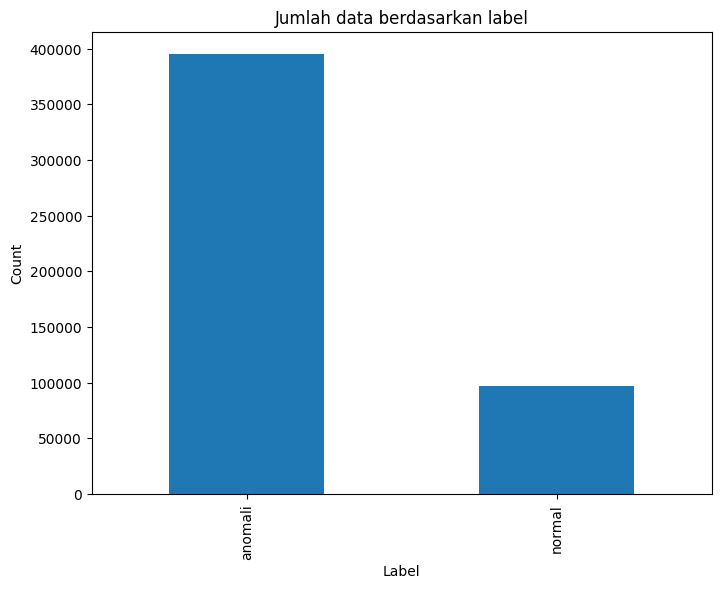

In [6]:
print("Kolom Sebelum dihapus: ", df["label"].unique())
df = df[df['label'].isin(['anomali', 'normal'])]
print("Kolom Setelah dihapus: ", df["label"].unique())

plt.figure(figsize=(8, 6))
df["label"].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Label")
plt.title("Jumlah data berdasarkan label")
plt.show()

## 2.5 Data transformation (label encoding dan standardization)

In [7]:
label_encoder = LabelEncoder()
for i in df_category["Column Name"]:
    df[i] = label_encoder.fit_transform(df[i])
    
scaler = MinMaxScaler()
for i in df_numeric["Column Name"]:
    df[i] = scaler.fit_transform(df[[i]])

display(df.head())
display(df.tail())
# df.to_csv("dataset_sarah_clean.csv", sep=";", index=False)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,1,22,8,0.01062,0.001613,0.0,0.0,0.0,0.066667,...,0.003922,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1,22,8,0.01062,0.001613,0.0,0.0,0.0,0.066667,...,0.007843,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1,22,8,0.01062,0.001613,0.0,0.0,0.0,0.066667,...,0.011765,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1,22,8,0.01062,0.001613,0.0,0.0,0.0,0.066667,...,0.015686,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1,22,8,0.01062,0.001613,0.0,0.0,0.0,0.066667,...,0.019608,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
494015,0.000154,1,19,8,0.0,0.998849,0.0,0.0,0.0,0.0,...,0.054902,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
494016,0.000154,1,19,8,0.0,0.999121,0.0,0.0,0.0,0.0,...,0.058824,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
494017,0.000171,1,19,8,0.0,0.999163,0.0,0.0,0.0,0.0,...,0.062745,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
494018,0.000171,1,19,8,0.0,0.998974,0.0,0.0,0.0,0.0,...,0.066667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
494019,0.000034,1,19,8,0.0,0.224829,0.0,0.0,0.0,0.0,...,0.070588,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


# 3. Membangun Model Autoencoder

## 3.1. Melakukan Splitting Dataset

Melakukan split data dengan proporsi 80:20

In [8]:
# check label distribution by class label
unique, counts = np.unique(df["label"], return_counts=True)
print("Jumlah data per kelas: ", dict(zip(unique, counts)))


X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size=0.2, random_state=42)

print("Jumlah data training: ", len(X_train))
print("Jumlah data testing: ", len(X_test))
X_train = X_train.drop(["label"], axis=1)
X_test = X_test.drop(["label"], axis=1)
display(X_train.head())
display(X_test.head())

# check data per kelas berdasarkan data training dan data testing
unique, counts = np.unique(y_train, return_counts=True)
print("Jumlah data training per kelas: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Jumlah data testing per kelas: ", dict(zip(unique, counts)))

Jumlah data per kelas:  {0: 395280, 1: 97277}
Jumlah data training:  394045
Jumlah data testing:  98512


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
249772,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
378051,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
211998,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0
178464,0.0,2,45,8,0.000020,0.0,0.0,0.0,0.0,0.0,...,1.0,0.992157,0.99,0.01,0.01,0.0,0.0,0.0,0.0,0.0
413255,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
386997,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
273105,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
339161,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
260849,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
319902,0.0,0,14,8,0.000201,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Jumlah data training per kelas:  {0: 316295, 1: 77750}
Jumlah data testing per kelas:  {0: 78985, 1: 19527}


## 3.2 Membangun Model Autoencoder

In [9]:
# Mendefinisikan arsitektur autoencoder
time_start = time()
input_dim = X_train.shape[1]  # Jumlah fitur
# encoding_dim = 32  # Jumlah neuron pada lapisan encoding

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer: Menambahkan beberapa lapisan untuk meningkatkan kompleksitas model
encoded = Dense(41, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
# encoded = Dense(16, activation='relu')(encoded)
# encoded = Dense(8, activation='relu')(encoded)
# encoded = Dense(4, activation='relu')(encoded)
# encoded = Dense(2, activation='relu')(encoded)

# Decoding layer: Menyesuaikan lapisan decoding untuk mencocokkan lapisan encoding
# decoded = Dense(2, activation='relu')(encoded)
# decoded = Dense(4, activation='relu')(decoded)
# decoded = Dense(8, activation='relu')(encoded)
# decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='sigmoid')(encoded)
decoded = Dense(41, activation='sigmoid')(decoded)

# Model autoencoder
autoencoder = Model(input_layer, decoded)

# Model encoder (bagian dari autoencoder)
encoder = Model(input_layer, encoded)

# Compile model autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Latih model autoencoder
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))
print("Waktu training autoencoder: ", time() - time_start)

Epoch 1/10
1540/1540 [==============================] - 9s 4ms/step - loss: -12.7749 - val_loss: -24.8203
Epoch 2/10
1540/1540 [==============================] - 5s 3ms/step - loss: -36.5682 - val_loss: -48.2440
Epoch 3/10
1540/1540 [==============================] - 6s 4ms/step - loss: -60.0005 - val_loss: -72.0751
Epoch 4/10
1540/1540 [==============================] - 5s 3ms/step - loss: -84.6521 - val_loss: -96.9089
Epoch 5/10
1540/1540 [==============================] - 5s 3ms/step - loss: -109.2349 - val_loss: -121.3593
Epoch 6/10
1540/1540 [==============================] - 5s 3ms/step - loss: -133.6804 - val_loss: -145.7621
Epoch 7/10
1540/1540 [==============================] - 5s 3ms/step - loss: -158.0974 - val_loss: -170.1517
Epoch 8/10
1540/1540 [==============================] - 5s 3ms/step - loss: -182.5092 - val_loss: -194.5358
Epoch 9/10
1540/1540 [==============================] - 6s 4ms/step - loss: -206.9235 - val_loss: -218.9307
Epoch 10/10
1540/1540 [=============

## 3.3 Melakukan Ekstraksi Fitur dengan Autoencoder

In [10]:

# Asumsikan 'encoder' adalah bagian encoder dari model autoencoder yang telah Anda bangun dan dilatih
# Asumsikan 'X_train' dan 'X_test' adalah data pelatihan dan pengujian yang telah Anda siapkan
time_start = time()
# Menggunakan encoder untuk mengubah data input menjadi fitur latensi
X_train_encoded_3 = encoder.predict(X_train)
X_test_encoded_3 = encoder.predict(X_test)

# Fitur-fitur latensi ini kini dapat digunakan sebagai input untuk model KNN
knn_3 = KNeighborsClassifier(n_neighbors=3)  # Misalnya, kita menggunakan K = 3

# Latih model KNN menggunakan fitur latensi dari data pelatihan
# Asumsikan 'y_train' adalah label untuk data pelatihan
knn_3.fit(X_train_encoded_3, y_train)

y_pred_encoder_3 = knn_3.predict(X_test_encoded_3)

# Evaluasi model KNN pada data pengujian
# Asumsikan 'y_test' adalah label untuk data pengujian
accuracy = knn_3.score(X_test_encoded_3, y_test)
print("Akurasi KNN: ", accuracy)
precision = precision_score(y_test, y_pred_encoder_3, average='weighted')
print("Precision KNN: ", precision)
recall = recall_score(y_test, y_pred_encoder_3, average='weighted')
print("Recall KNN: ", recall)
f1 = f1_score(y_test, y_pred_encoder_3, average='weighted')
print("F1 KNN: ", f1)
print("Waktu training Encoder + KNN Dengan K = 3: ", time() - time_start)

3079/3079 [==============================] - 4s 1ms/step
Akurasi KNN:  0.9992183693357154
Precision KNN:  0.9992185310925319
Recall KNN:  0.9992183693357154
F1 KNN:  0.9992184371112863
Waktu training Encoder + KNN Dengan K = 3:  217.06067037582397


In [11]:
# Asumsikan 'encoder' adalah bagian encoder dari model autoencoder yang telah Anda bangun dan dilatih
# Asumsikan 'X_train' dan 'X_test' adalah data pelatihan dan pengujian yang telah Anda siapkan
time_start = time()
# Menggunakan encoder untuk mengubah data input menjadi fitur latensi
X_train_encoded_5 = encoder.predict(X_train)
X_test_encoded_5 = encoder.predict(X_test)

# Fitur-fitur latensi ini kini dapat digunakan sebagai input untuk model KNN
knn_5 = KNeighborsClassifier(n_neighbors=5)  # Misalnya, kita menggunakan K = 3

# Latih model KNN menggunakan fitur latensi dari data pelatihan
# Asumsikan 'y_train' adalah label untuk data pelatihan
knn_5.fit(X_train_encoded_5, y_train)

y_pred_encoder_5 = knn_5.predict(X_test_encoded_5)

# Evaluasi model KNN pada data pengujian
# Asumsikan 'y_test' adalah label untuk data pengujian
accuracy = knn_5.score(X_test_encoded_5, y_test)
print("Akurasi KNN: ", accuracy)
precision = precision_score(y_test, y_pred_encoder_5, average='weighted')
print("Precision KNN: ", precision)
recall = recall_score(y_test, y_pred_encoder_5, average='weighted')
print("Recall KNN: ", recall)
f1 = f1_score(y_test, y_pred_encoder_5, average='weighted')
print("F1 KNN: ", f1)
print("Waktu training Encoder + KNN Dengan K = 5: ", time() - time_start)

3079/3079 [==============================] - 4s 1ms/step
Akurasi KNN:  0.9989544420984245
Precision KNN:  0.9989548169712303
Recall KNN:  0.9989544420984245
F1 KNN:  0.9989545931670905
Waktu training Encoder + KNN Dengan K = 5:  213.48992729187012


In [12]:
# Asumsikan 'encoder' adalah bagian encoder dari model autoencoder yang telah Anda bangun dan dilatih
# Asumsikan 'X_train' dan 'X_test' adalah data pelatihan dan pengujian yang telah Anda siapkan
time_start = time()
# Menggunakan encoder untuk mengubah data input menjadi fitur latensi
X_train_encoded_7 = encoder.predict(X_train)
X_test_encoded_7 = encoder.predict(X_test)

# Fitur-fitur latensi ini kini dapat digunakan sebagai input untuk model KNN
knn_7 = KNeighborsClassifier(n_neighbors=7)  # Misalnya, kita menggunakan K = 3

# Latih model KNN menggunakan fitur latensi dari data pelatihan
# Asumsikan 'y_train' adalah label untuk data pelatihan
knn_7.fit(X_train_encoded_7, y_train)

y_pred_encoder_7 = knn_7.predict(X_test_encoded_7)

# Evaluasi model KNN pada data pengujian
# Asumsikan 'y_test' adalah label untuk data pengujian
accuracy = knn_7.score(X_test_encoded_7, y_test)
print("Akurasi KNN: ", accuracy)
precision = precision_score(y_test, y_pred_encoder_7, average='weighted')
print("Precision KNN: ", precision)
recall = recall_score(y_test, y_pred_encoder_7, average='weighted')
print("Recall KNN: ", recall)
f1 = f1_score(y_test, y_pred_encoder_7, average='weighted')
print("F1 KNN: ", f1)
print("Waktu training Encoder + KNN Dengan K = 7: ", time() - time_start)

3079/3079 [==============================] - 4s 1ms/step
Akurasi KNN:  0.9987412700990742
Precision KNN:  0.9987418112166162
Recall KNN:  0.9987412700990742
F1 KNN:  0.9987414883183364
Waktu training Encoder + KNN Dengan K = 7:  214.58692336082458


In [13]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Starting the timer
time_start = time()

# Assuming the 'autoencoder' and 'X_train', 'X_test' variables are defined elsewhere
# Transforming the training and test sets with the autoencoder
X_train_autoencoder_3 = autoencoder.predict(X_train)
X_test_autoencoder_3 = autoencoder.predict(X_test)

# Initializing the KNN classifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

# Fitting the model on the encoded training data
knn_3.fit(X_train_autoencoder_3, y_train)

# Corrected: Evaluating the model on the encoded test data
accuracy = knn_3.score(X_test_autoencoder_3, y_test)
print("Accuracy KNN: ", accuracy)

# Predicting the test set results for further metrics
y_pred_autoencoder_3 = knn_3.predict(X_test_autoencoder_3)

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_autoencoder_3, average='weighted')
print("Precision KNN: ", precision)

recall = recall_score(y_test, y_pred_autoencoder_3, average='weighted')
print("Recall KNN: ", recall)

f1 = f1_score(y_test, y_pred_autoencoder_3, average='weighted')
print("F1 KNN: ", f1)

# Ending the timer and printing the elapsed time
print("Time for training Autoencoder/Decoder + KNN Dengan K = 3: ", time() - time_start)

3079/3079 [==============================] - 5s 1ms/step
Accuracy KNN:  0.801810946889719
Precision KNN:  0.8014520555908154
Recall KNN:  0.801810946889719
F1 KNN:  0.7136663691001633
Time for training Autoencoder/Decoder + KNN Dengan K = 3:  233.37378334999084


In [14]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Starting the timer
time_start = time()

# Assuming the 'autoencoder' and 'X_train', 'X_test' variables are defined elsewhere
# Transforming the training and test sets with the autoencoder
X_train_autoencoder_5 = autoencoder.predict(X_train)
X_test_autoencoder_5 = autoencoder.predict(X_test)

# Initializing the KNN classifier
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the encoded training data
knn_5.fit(X_train_autoencoder_5, y_train)

# Corrected: Evaluating the model on the encoded test data
accuracy = knn_5.score(X_test_autoencoder_5, y_test)
print("Accuracy KNN: ", accuracy)

# Predicting the test set results for further metrics
y_pred_autoencoder_5 = knn_5.predict(X_test_autoencoder_5)

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_autoencoder_5, average='weighted')
print("Precision KNN: ", precision)

recall = recall_score(y_test, y_pred_autoencoder_5, average='weighted')
print("Recall KNN: ", recall)

f1 = f1_score(y_test, y_pred_autoencoder_5, average='weighted')
print("F1 KNN: ", f1)

# Ending the timer and printing the elapsed time
print("Time for training Autoencoder/Decoder + KNN Dengan K = 5: ", time() - time_start)

3079/3079 [==============================] - 4s 1ms/step
Accuracy KNN:  0.8018210979373072
Precision KNN:  0.8410975699494275
Recall KNN:  0.8018210979373072
F1 KNN:  0.7136713874029649
Time for training Autoencoder/Decoder + KNN Dengan K = 5:  233.51601123809814


In [15]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Starting the timer
time_start = time()

# Assuming the 'autoencoder' and 'X_train', 'X_test' variables are defined elsewhere
# Transforming the training and test sets with the autoencoder
X_train_autoencoder_7 = autoencoder.predict(X_train)
X_test_autoencoder_7 = autoencoder.predict(X_test)

# Initializing the KNN classifier
knn_7 = KNeighborsClassifier(n_neighbors=5)

# Fitting the model on the encoded training data
knn_7.fit(X_train_autoencoder_7, y_train)

# Corrected: Evaluating the model on the encoded test data
accuracy = knn_7.score(X_test_autoencoder_7, y_test)
print("Accuracy KNN: ", accuracy)

# Predicting the test set results for further metrics
y_pred_autoencoder_7 = knn_7.predict(X_test_autoencoder_7)

# Calculating precision, recall, and F1 score
precision = precision_score(y_test, y_pred_autoencoder_7, average='weighted')
print("Precision KNN: ", precision)

recall = recall_score(y_test, y_pred_autoencoder_7, average='weighted')
print("Recall KNN: ", recall)

f1 = f1_score(y_test, y_pred_autoencoder_7, average='weighted')
print("F1 KNN: ", f1)

# Ending the timer and printing the elapsed time
print("Time for training Autoencoder/Decoder + KNN Dengan K = 7: ", time() - time_start)

3079/3079 [==============================] - 4s 1ms/step
Accuracy KNN:  0.8018210979373072
Precision KNN:  0.8410975699494275
Recall KNN:  0.8018210979373072
F1 KNN:  0.7136713874029649
Time for training Autoencoder/Decoder + KNN Dengan K = 7:  233.41907835006714


In [16]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# KNNNonAutoencoder = KNeighborsClassifier(n_neighbors=3)
# time_start = time()
# KNNNonAutoencoder.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)
# accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
# precision_score_knn = precision_score(y_test, y_pred_knn, average='weighted')
# recall_score_knn = recall_score(y_test, y_pred_knn, average='weighted')
# f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

# print("Akurasi Score tanpa Autoencoder: ", accuracy_score_knn)
# print("Precision Score tanpa Autoencoder: ", precision_score_knn)
# print("Recall Score tanpa Autoencoder: ", recall_score_knn)
# print("F1 Score tanpa Autoencoder: ", f1_score_knn)
# print("Waktu training KNN: ", time() - time_start)

In [17]:
# # Save file X_train and X_test
# X_train.to_csv("X_train.csv", sep=";", index=False)
# X_test.to_csv("X_test.csv", sep=";", index=False)
# y_train.to_csv("y_train.csv", sep=";", index=False)
# y_test.to_csv("y_test.csv", sep=";", index=False)

# X_train_and_y_train = pd.concat([X_train, y_train], axis=1)
# X_test_and_y_test = pd.concat([X_test, y_test], axis=1)

# X_train_and_y_train.to_csv("X_train_and_y_train.csv", sep=";", index=False)
# X_test_and_y_test.to_csv("X_test_and_y_test.csv", sep=";", index=False)

# # Save file X_train_encoded and X_test_encoded
# X_train_encoded = pd.DataFrame(X_train_encoded)
# X_test_encoded = pd.DataFrame(X_test_encoded)

# X_train_encoded_and_y_train = pd.concat([X_train_encoded, y_train], axis=1)
# X_test_encoded_and_y_test = pd.concat([X_test_encoded, y_test], axis=1)

# X_train_encoded.to_csv("X_train_encoded.csv", sep=";", index=False)
# X_test_encoded.to_csv("X_test_encoded.csv", sep=";", index=False)
# X_train_encoded_and_y_train.to_csv("X_train_encoded_and_y_train.csv", sep=";", index=False)
# X_test_encoded_and_y_test.to_csv("X_test_encoded_and_y_test.csv", sep=";", index=False)

In [18]:
# Hasil Prediksi
# y_pred = knn.predict(X_test_encoded)
# y_pred = pd.DataFrame(y_pred)
# y_pred.to_csv("y_pred.csv", sep=";", index=False)

In [19]:
# accuracy_score = accuracy_score(y_test, y_pred)
# precision_score = precision_score(y_test, y_pred, average='weighted')
# recall_score = recall_score(y_test, y_pred, average='weighted')
# f1_score = f1_score(y_test, y_pred, average='weighted')

# pd_result = pd.DataFrame({
#     "accuracy_score": [accuracy_score],
#     "precision_score": [precision_score],
#     "recall_score": [recall_score],
#     "f1_score": [f1_score]
# })

# pd_result.index = ["Hasil"]
# pd_result

# pd_result.plot(kind='bar')
# plt.ylabel("Score")
# plt.xlabel("Hasil")
# plt.title("Hasil Prediksi")
# plt.show()

Encoder + KNN Dengan K = 3


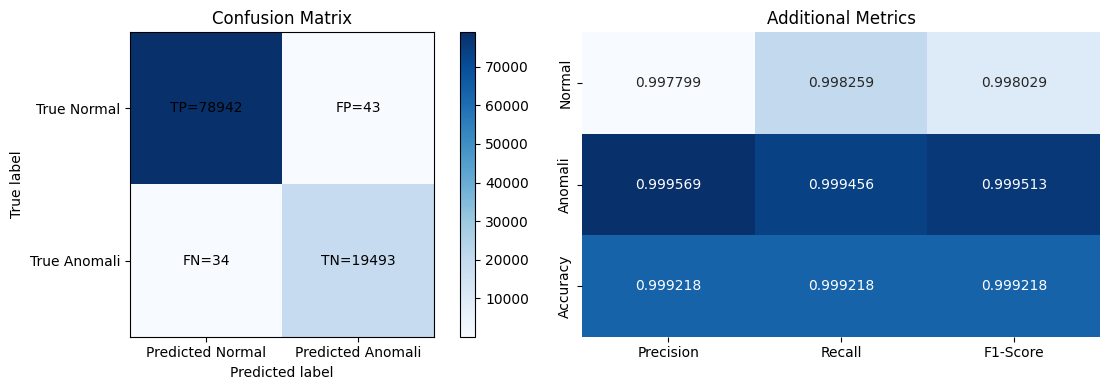

Precision Normal TN / (TN + FP):  0.9977989352989353
Recall Normal TN / (TN + FN):  0.9982588211194756
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.998028825231037
Precision Anomali TP / (TP + FN):  0.999569489465154
Recall Anomali TP / (TP + FP):  0.9994555928340825
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.999512537904926
Accuracy:  0.9992183693357154

Weighted Average Precision:  0.9992185310925319
Weighted Average Recall:  0.9992183693357155
Weighted Average F1:  0.9992184371112863


In [20]:
print("Encoder + KNN Dengan K = 3")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_encoder_3)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
precision_normal = TN / (TN + FP)
recall_normal = TN / (TN + FN)
f1_normal = 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = TP / (TP + FN)
recall_anomali = TP / (TP + FP)
f1_anomali = 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)



# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


Encoder + KNN Dengan K = 5


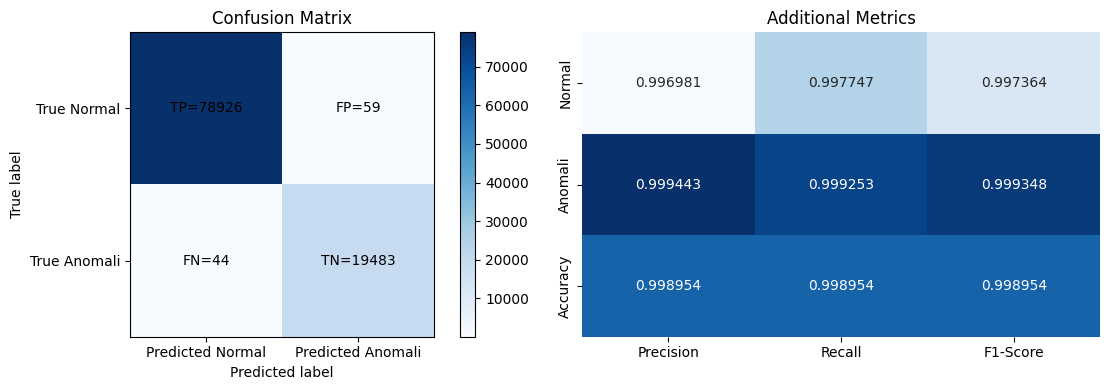

Precision Normal TN / (TN + FP):  0.9969808617337018
Recall Normal TN / (TN + FN):  0.9977467096840272
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.9973636386905219
Precision Anomali TP / (TP + FN):  0.9994428263897682
Recall Anomali TP / (TP + FP):  0.999253022725834
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.9993479155455668
Accuracy:  0.9989544420984245

Weighted Average Precision:  0.9989548169712303
Weighted Average Recall:  0.9989544420984245
Weighted Average F1:  0.9989545931670905


In [21]:
print("Encoder + KNN Dengan K = 5")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_encoder_5)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
precision_normal = TN / (TN + FP)
recall_normal = TN / (TN + FN)
f1_normal = 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = TP / (TP + FN)
recall_anomali = TP / (TP + FP)
f1_anomali = 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)



# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


Encoder + KNN Dengan K = 7


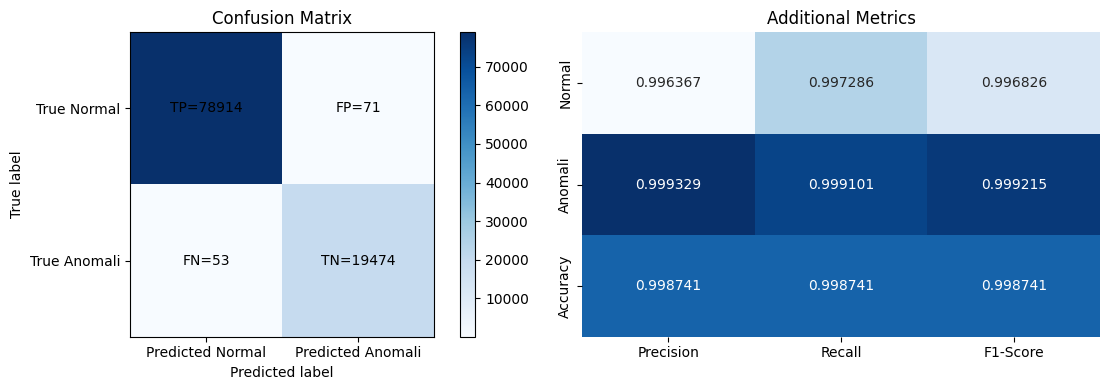

Precision Normal TN / (TN + FP):  0.9963673573804042
Recall Normal TN / (TN + FN):  0.9972858093921237
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.9968263718263718
Precision Anomali TP / (TP + FN):  0.9993288335633872
Recall Anomali TP / (TP + FP):  0.9991010951446477
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.9992149513776337
Accuracy:  0.9987412700990742

Weighted Average Precision:  0.9987418112166162
Weighted Average Recall:  0.9987412700990742
Weighted Average F1:  0.9987414883183365


In [22]:
print("Encoder + KNN Dengan K = 7")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_encoder_7)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
precision_normal = TN / (TN + FP)
recall_normal = TN / (TN + FN)
f1_normal = 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = TP / (TP + FN)
recall_anomali = TP / (TP + FP)
f1_anomali = 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)



# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


In [23]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_encoder_3, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Encoder + KNN Dengan K = 3")
report_df

Classification Report untuk Encoder + KNN Dengan K = 3


,precision,recall,f1-score,support
anomali,0.999569,0.999456,0.999513,78985.000000
normal,0.997799,0.998259,0.998029,19527.000000
accuracy,0.999218,0.999218,0.999218,0.999218
macro avg,0.998684,0.998857,0.998771,98512.000000
weighted avg,0.999219,0.999218,0.999218,98512.000000


In [24]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_encoder_5, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Encoder + KNN Dengan K = 5")
report_df

Classification Report untuk Encoder + KNN Dengan K = 5


,precision,recall,f1-score,support
anomali,0.999443,0.999253,0.999348,78985.000000
normal,0.996981,0.997747,0.997364,19527.000000
accuracy,0.998954,0.998954,0.998954,0.998954
macro avg,0.998212,0.998500,0.998356,98512.000000
weighted avg,0.998955,0.998954,0.998955,98512.000000


In [25]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_encoder_7, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Encoder + KNN Dengan K = 7")
report_df

Classification Report untuk Encoder + KNN Dengan K = 7


,precision,recall,f1-score,support
anomali,0.999329,0.999101,0.999215,78985.000000
normal,0.996367,0.997286,0.996826,19527.000000
accuracy,0.998741,0.998741,0.998741,0.998741
macro avg,0.997848,0.998193,0.998021,98512.000000
weighted avg,0.998742,0.998741,0.998741,98512.000000


Autoencoder/Decoder + KNN dengan K = 3


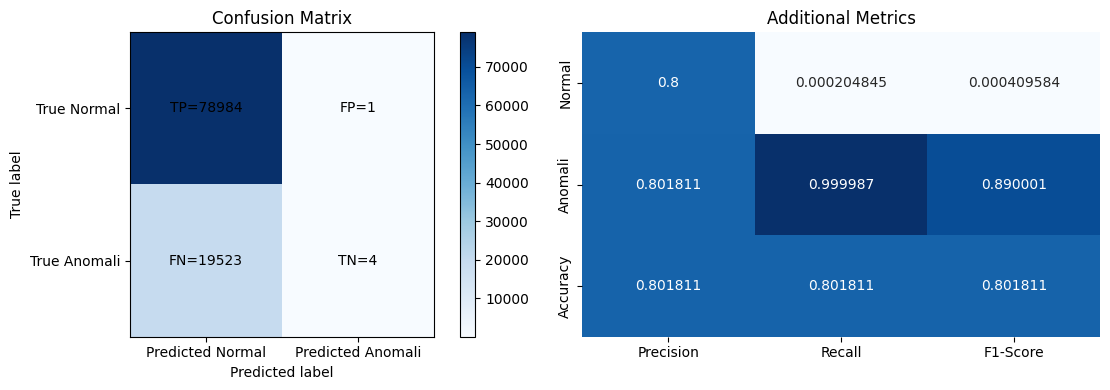

Precision Normal TN / (TN + FP):  0.8
Recall Normal TN / (TN + FN):  0.00020484457417934142
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.00040958427196395656
Precision Anomali TP / (TP + FN):  0.8018110388094247
Recall Anomali TP / (TP + FP):  0.9999873393682345
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.8900006760868096
Accuracy:  0.801810946889719

Weighted Average Precision:  0.8014520555908154
Weighted Average Recall:  0.8018109468897191
Weighted Average F1:  0.7136663691001633


In [26]:
print("Autoencoder/Decoder + KNN dengan K = 3")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_autoencoder_3)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
# Calculate additional metrics with checks for zero denominators
precision_normal = 0 if (TN + FP) == 0 else TN / (TN + FP)
recall_normal = 0 if (TN + FN) == 0 else TN / (TN + FN)
f1_normal = 0 if (precision_normal + recall_normal) == 0 else 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = 0 if (TP + FN) == 0 else TP / (TP + FN)
recall_anomali = 0 if (TP + FP) == 0 else TP / (TP + FP)
f1_anomali = 0 if (precision_anomali + recall_anomali) == 0 else 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)


# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


Autoencoder/Decoder + KNN dengan K = 5


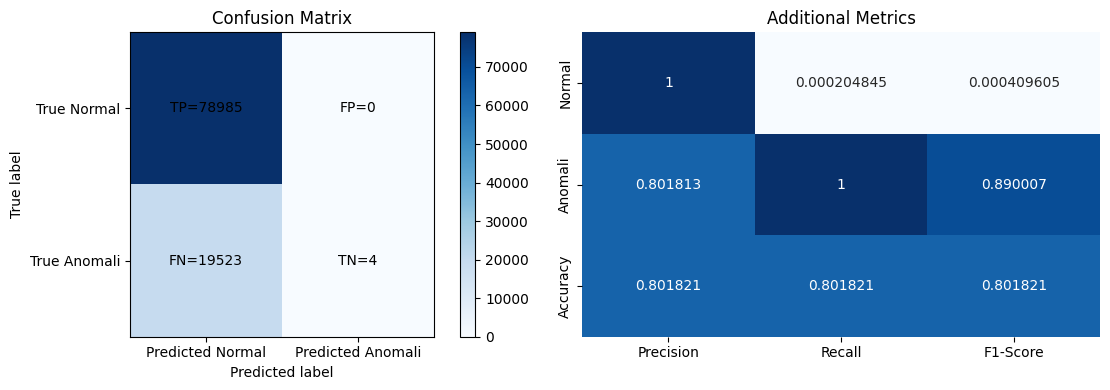

Precision Normal TN / (TN + FP):  1.0
Recall Normal TN / (TN + FN):  0.00020484457417934142
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.0004096052429471097
Precision Anomali TP / (TP + FN):  0.8018130507166931
Recall Anomali TP / (TP + FP):  1.0
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.8900069298507546
Accuracy:  0.8018210979373072

Weighted Average Precision:  0.8410975699494275
Weighted Average Recall:  0.8018210979373072
Weighted Average F1:  0.713671387402965


In [27]:
print("Autoencoder/Decoder + KNN dengan K = 5")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_autoencoder_5)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
# Calculate additional metrics with checks for zero denominators
precision_normal = 0 if (TN + FP) == 0 else TN / (TN + FP)
recall_normal = 0 if (TN + FN) == 0 else TN / (TN + FN)
f1_normal = 0 if (precision_normal + recall_normal) == 0 else 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = 0 if (TP + FN) == 0 else TP / (TP + FN)
recall_anomali = 0 if (TP + FP) == 0 else TP / (TP + FP)
f1_anomali = 0 if (precision_anomali + recall_anomali) == 0 else 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)


# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


Autoencoder/Decoder + KNN dengan K = 7


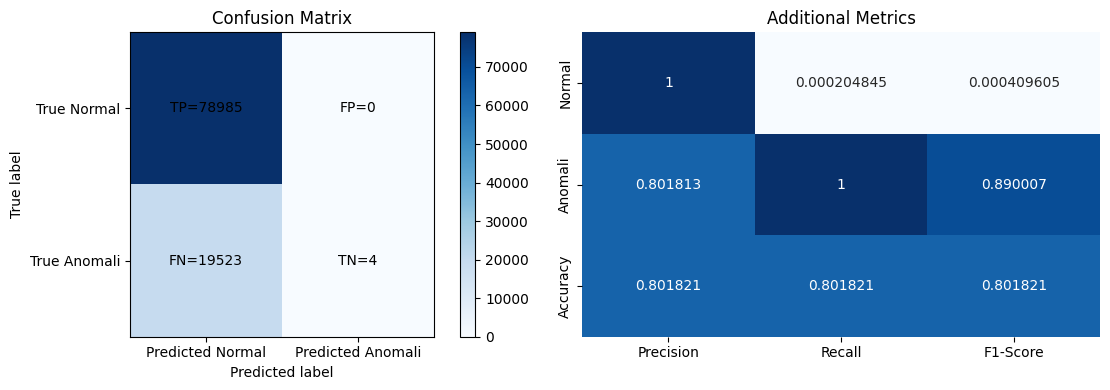

Precision Normal TN / (TN + FP):  1.0
Recall Normal TN / (TN + FN):  0.00020484457417934142
F1 Normal (2 * (Precision * Recall) / (Precision + Recall)):  0.0004096052429471097
Precision Anomali TP / (TP + FN):  0.8018130507166931
Recall Anomali TP / (TP + FP):  1.0
F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)):  0.8900069298507546
Accuracy:  0.8018210979373072

Weighted Average Precision:  0.8410975699494275
Weighted Average Recall:  0.8018210979373072
Weighted Average F1:  0.713671387402965


In [28]:
print("Autoencoder/Decoder + KNN dengan K = 7")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_autoencoder_7)

# Calculate TP, FP, FN, TN
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# Calculate class weights
weight_normal = np.sum(y_test == 0) / len(y_test)
weight_anomali = np.sum(y_test == 1) / len(y_test)


# Calculate additional metrics
accuracy = (TP + TN) / np.sum(cm)
# Calculate additional metrics with checks for zero denominators
precision_normal = 0 if (TN + FP) == 0 else TN / (TN + FP)
recall_normal = 0 if (TN + FN) == 0 else TN / (TN + FN)
f1_normal = 0 if (precision_normal + recall_normal) == 0 else 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# Correct the calculation for precision, recall, and F1-score for the anomaly class
precision_anomali = 0 if (TP + FN) == 0 else TP / (TP + FN)
recall_anomali = 0 if (TP + FP) == 0 else TP / (TP + FP)
f1_anomali = 0 if (precision_anomali + recall_anomali) == 0 else 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# Calculate weighted averages
weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)


# Display confusion matrix and additional metrics
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
plt.yticks([0, 1], ['True Normal', 'True Anomali'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

plt.subplot(122)
labels = ['Normal', 'Anomali', 'Accuracy']
metrics_data = {
    'Precision': [precision_normal, precision_anomali, accuracy],
    'Recall': [recall_normal, recall_anomali, accuracy],
    'F1-Score': [f1_normal, f1_anomali, accuracy]
}
metrics_df = pd.DataFrame(metrics_data, index=labels)
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
plt.title('Additional Metrics')

plt.tight_layout()
plt.show()

print("====================================")
print("Precision Normal TN / (TN + FP): ", precision_normal)
print("Recall Normal TN / (TN + FN): ", recall_normal)
print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
print("====================================")
print("Precision Anomali TP / (TP + FN): ", precision_anomali)
print("Recall Anomali TP / (TP + FP): ", recall_anomali)
print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
print("====================================")
print("Accuracy: ", accuracy)
print("====================================")
print("")
print("Weighted Average Precision: ", weighted_precision)
print("Weighted Average Recall: ", weighted_recall)
print("Weighted Average F1: ", weighted_f1)


In [29]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_autoencoder_3, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Autoencder/Decoder + KNN Dengan K = 3")
report_df

Classification Report untuk Autoencder/Decoder + KNN Dengan K = 3


,precision,recall,f1-score,support
anomali,0.801811,0.999987,0.890001,78985.000000
normal,0.800000,0.000205,0.000410,19527.000000
accuracy,0.801811,0.801811,0.801811,0.801811
macro avg,0.800906,0.500096,0.445205,98512.000000
weighted avg,0.801452,0.801811,0.713666,98512.000000


In [30]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_autoencoder_5, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Autoencder/Decoder + KNN Dengan K = 5")
report_df

Classification Report untuk Autoencder/Decoder + KNN Dengan K = 5


,precision,recall,f1-score,support
anomali,0.801813,1.000000,0.890007,78985.000000
normal,1.000000,0.000205,0.000410,19527.000000
accuracy,0.801821,0.801821,0.801821,0.801821
macro avg,0.900907,0.500102,0.445208,98512.000000
weighted avg,0.841098,0.801821,0.713671,98512.000000


In [31]:
import pandas as pd
from sklearn.metrics import classification_report

# Misalkan y_test dan y_pred sudah didefinisikan
# class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
classication_report_dict = classification_report(y_test, y_pred_autoencoder_7, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# change 0 and 1 to anomali and normal
classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# Membuat DataFrame dari classification report
report_df = pd.DataFrame(classication_report_dict).transpose()

# Menampilkan DataFrame
print("Classification Report untuk Autoencder/Decoder + KNN Dengan K = 7")
report_df

Classification Report untuk Autoencder/Decoder + KNN Dengan K = 7


,precision,recall,f1-score,support
anomali,0.801813,1.000000,0.890007,78985.000000
normal,1.000000,0.000205,0.000410,19527.000000
accuracy,0.801821,0.801821,0.801821,0.801821
macro avg,0.900907,0.500102,0.445208,98512.000000
weighted avg,0.841098,0.801821,0.713671,98512.000000


In [32]:
# print("KNN")
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred_knn)

# # Calculate TP, FP, FN, TN
# TP = cm[0, 0]
# FP = cm[0, 1]
# FN = cm[1, 0]
# TN = cm[1, 1]

# # Calculate class weights
# weight_normal = np.sum(y_test == 0) / len(y_test)
# weight_anomali = np.sum(y_test == 1) / len(y_test)


# # Calculate additional metrics
# accuracy = (TP + TN) / np.sum(cm)
# precision_normal = TN / (TN + FP)
# recall_normal = TN / (TN + FN)
# f1_normal = 2 * (precision_normal * recall_normal) / (precision_normal + recall_normal)

# # Correct the calculation for precision, recall, and F1-score for the anomaly class
# precision_anomali = TP / (TP + FN)
# recall_anomali = TP / (TP + FP)
# f1_anomali = 2 * (precision_anomali * recall_anomali) / (precision_anomali + recall_anomali)

# # Calculate weighted averages
# weighted_precision = (precision_normal * weight_anomali) + (precision_anomali * weight_normal)
# weighted_recall = (recall_normal * weight_anomali) + (recall_anomali * weight_normal)
# weighted_f1 = (f1_normal * weight_anomali) + (f1_anomali * weight_normal)



# # Display confusion matrix and additional metrics
# plt.figure(figsize=(12, 4))

# plt.subplot(121)
# plt.imshow(cm, interpolation='nearest', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xticks([0, 1], ['Predicted Normal', 'Predicted Anomali'])
# plt.yticks([0, 1], ['True Normal', 'True Anomali'])
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.text(0, 0, f'TP={TP}', ha='center', va='center', color='black')
# plt.text(1, 0, f'FP={FP}', ha='center', va='center', color='black')
# plt.text(0, 1, f'FN={FN}', ha='center', va='center', color='black')
# plt.text(1, 1, f'TN={TN}', ha='center', va='center', color='black')

# plt.subplot(122)
# labels = ['Normal', 'Anomali', 'Accuracy']
# metrics_data = {
#     'Precision': [precision_normal, precision_anomali, accuracy],
#     'Recall': [recall_normal, recall_anomali, accuracy],
#     'F1-Score': [f1_normal, f1_anomali, accuracy]
# }
# metrics_df = pd.DataFrame(metrics_data, index=labels)
# sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.6g', cbar=False)
# plt.title('Additional Metrics')

# plt.tight_layout()
# plt.show()

# print("====================================")
# print("Precision Normal TN / (TN + FP): ", precision_normal)
# print("Recall Normal TN / (TN + FN): ", recall_normal)
# print("F1 Normal (2 * (Precision * Recall) / (Precision + Recall)): ", f1_normal)
# print("====================================")
# print("Precision Anomali TP / (TP + FN): ", precision_anomali)
# print("Recall Anomali TP / (TP + FP): ", recall_anomali)
# print("F1 Anomali (2 * (Precision * Recall) / (Precision + Recall)): ", f1_anomali)
# print("====================================")
# print("Accuracy: ", accuracy)
# print("====================================")
# print("")
# print("Weighted Average Precision: ", weighted_precision)
# print("Weighted Average Recall: ", weighted_recall)
# print("Weighted Average F1: ", weighted_f1)

In [33]:
# import pandas as pd
# from sklearn.metrics import classification_report

# # Misalkan y_test dan y_pred sudah didefinisikan
# # class_report = classification_report(y_test, y_pred, output_dict=True) # Asli dari pertanyaan
# classication_report_dict = classification_report(y_test, y_pred_knn, output_dict=True) # Koreksi nama variable dan tambahkan output_dict=True
# # change 0 and 1 to anomali and normal
# classication_report_dict = { "anomali": classication_report_dict.pop("0"), "normal": classication_report_dict.pop("1"), "accuracy": classication_report_dict.pop("accuracy"), "macro avg": classication_report_dict.pop("macro avg"), "weighted avg": classication_report_dict.pop("weighted avg")}

# # Membuat DataFrame dari classification report
# report_df = pd.DataFrame(classication_report_dict).transpose()

# # Menampilkan DataFrame
# print("Classification Report untuk KNN")
# report_df

In [34]:
# from sklearn.metrics import roc_curve, auc

# # Menghitung nilai false positive rate dan true positive rate
# fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [35]:
# plt.figure(figsize=(8, 6))
# sns.histplot(knn.predict_proba(X_test_encoded)[:, 1], bins=30, kde=True)
# plt.title('Distribusi Skor Prediksi')
# plt.xlabel('Skor Prediksi (Probabilitas Kelas Positif)')
# plt.ylabel('Frekuensi')
# plt.show()

In [36]:
# # Save Excel files for training and testing datasets
# X_train.to_excel("Data_Pelatihan.xlsx", sheet_name='X_train', index=False)
# X_test.to_excel("Data_Pengujian.xlsx", sheet_name='X_test', index=False)
# y_train.to_excel("Label_Data_Pelatihan.xlsx", sheet_name='y_train', index=False)
# y_test.to_excel("Label_Data_Pengujian.xlsx", sheet_name='y_test', index=False)

# # Combine X and y for training and testing, then save
# X_train_and_y_train = pd.concat([X_train, y_train], axis=1)
# X_test_and_y_test = pd.concat([X_test, y_test], axis=1)

# with pd.ExcelWriter("Gabungan_Data_Pelatihan.xlsx") as writer:
#     X_train_and_y_train.to_excel(writer, sheet_name='X_train_and_y_train', index=False)

# with pd.ExcelWriter("Gabungan_Data_Pengujian.xlsx") as writer:
#     X_test_and_y_test.to_excel(writer, sheet_name='X_test_and_y_test', index=False)

# # Save Excel files for encoded training and testing datasets
# X_train_encoded = pd.DataFrame(X_train_encoded)
# X_test_encoded = pd.DataFrame(X_test_encoded)

# X_train_encoded_and_y_train = pd.concat([X_train_encoded, y_train], axis=1)
# X_test_encoded_and_y_test = pd.concat([X_test_encoded, y_test], axis=1)

# X_train_encoded.to_excel("Data_Pelatihan_Terenkoding.xlsx", sheet_name='X_train_encoded', index=False)
# X_test_encoded.to_excel("Data_Pengujian_Terenkoding.xlsx", sheet_name='X_test_encoded', index=False)

# with pd.ExcelWriter("Gabungan_Data_Pelatihan_Terenkoding.xlsx") as writer:
#     X_train_encoded_and_y_train.to_excel(writer, sheet_name='X_train_encoded_and_y_train', index=False)

# with pd.ExcelWriter("Gabungan_Data_Pengujian_Terenkoding.xlsx") as writer:
#     X_test_encoded_and_y_test.to_excel(writer, sheet_name='X_test_encoded_and_y_test', index=False)
    
# # Save Excel files for predicted labels
# y_pred = pd.DataFrame(y_pred)
# y_pred.to_excel("Prediksi.xlsx", sheet_name='y_pred', index=False)